In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

print ("done")

done


In [2]:
df = pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700
1006,2019-12-16,300.850006,305.709991,298.630005,304.209991,304.209991,4658900


In [4]:
df.shape

(1007, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.515000,125.515000,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


In [6]:
df.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,1007,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
unique,1007,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-08-04,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,NaN,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,NaN,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,NaN,125.779999,127.165001,124.355000,125.515000,125.515000,5.573200e+06
50%,NaN,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,NaN,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07


In [7]:
df.corr(method="pearson")

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999489,0.999333,0.998712,0.998712,-0.095059
High,0.999489,1.000000,0.999264,0.999438,0.999438,-0.084998
Low,0.999333,0.999264,1.000000,0.999448,0.999448,-0.107404
Close,0.998712,0.999438,0.999448,1.000000,1.000000,-0.095180
Adj Close,0.998712,0.999438,0.999448,1.000000,1.000000,-0.095180
Volume,-0.095059,-0.084998,-0.107404,-0.095180,-0.095180,1.000000


In [8]:
corr = df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999489,0.999333,0.998712,0.998712,-0.095059
High,0.999489,1.000000,0.999264,0.999438,0.999438,-0.084998
Low,0.999333,0.999264,1.000000,0.999448,0.999448,-0.107404
Close,0.998712,0.999438,0.999448,1.000000,1.000000,-0.095180
Adj Close,0.998712,0.999438,0.999448,1.000000,1.000000,-0.095180
Volume,-0.095059,-0.084998,-0.107404,-0.095180,-0.095180,1.000000


<AxesSubplot:>

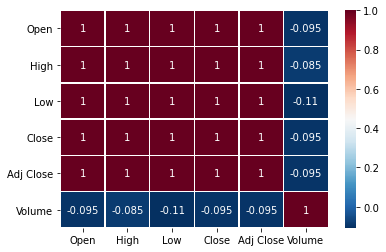

In [9]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [10]:
#prepare dataset to work with 
nflx_df=df[["Date","High","Open","Low","Close"]]
nflx_df.head(10)

,Date,High,Open,Low,Close
0,2015-12-16,123.000000,119.800003,118.089996,122.639999
1,2015-12-17,126.349998,123.970001,122.419998,122.510002
2,2015-12-18,122.190002,120.849998,117.919998,118.019997
3,2015-12-21,119.589996,119.510002,115.660004,116.629997
4,2015-12-22,117.430000,117.300003,114.860001,116.239998
5,2015-12-23,118.559998,116.910004,115.779999,118.160004
6,2015-12-24,118.800003,118.220001,117.300003,117.330002
7,2015-12-28,117.349998,117.260002,113.849998,117.110001
8,2015-12-29,119.599998,118.190002,116.919998,119.120003
9,2015-12-30,119.019997,118.949997,116.430000,116.709999


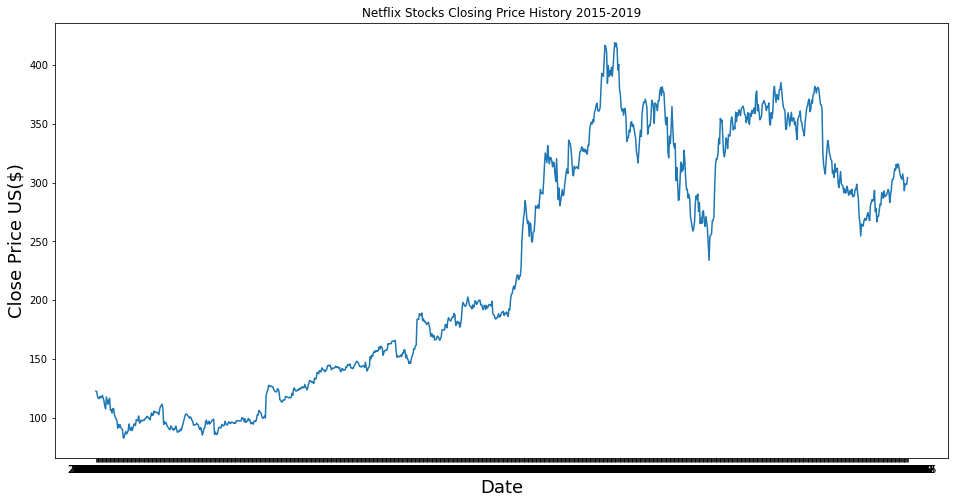

In [11]:
plt.figure(figsize=(16,8))
plt.title("Netflix Stocks Closing Price History 2015-2019")
plt.plot(nflx_df["Date"],nflx_df["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price US($)",fontsize=18)
plt.style.use("fivethirtyeight")
plt.show()

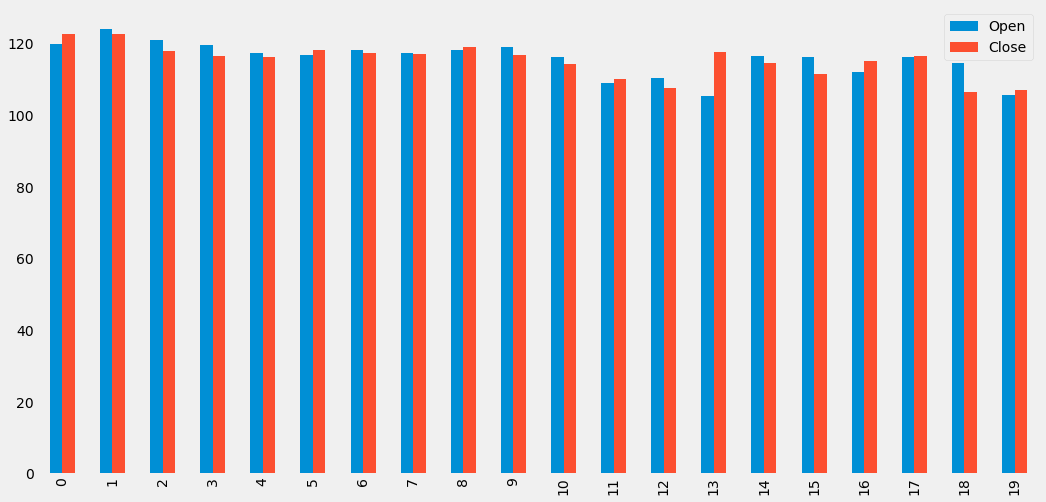

In [12]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

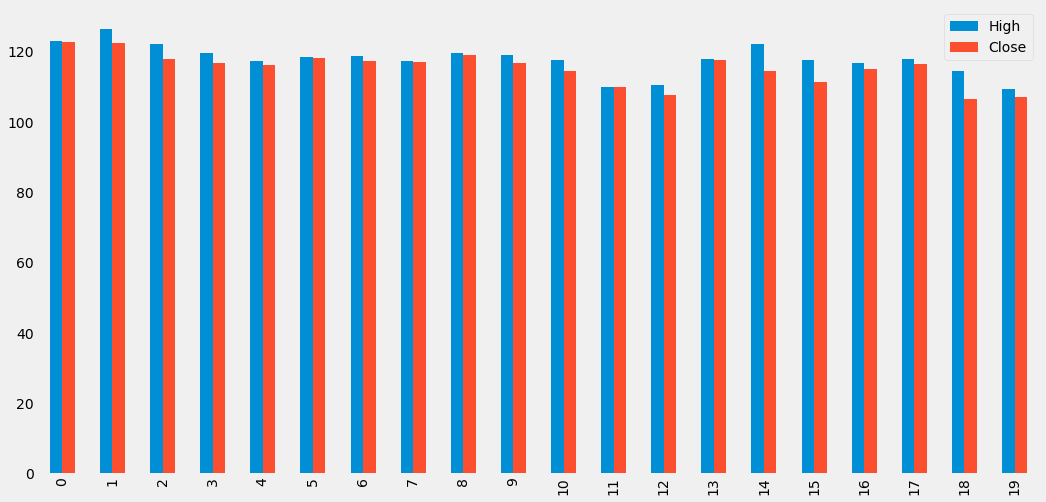

In [13]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

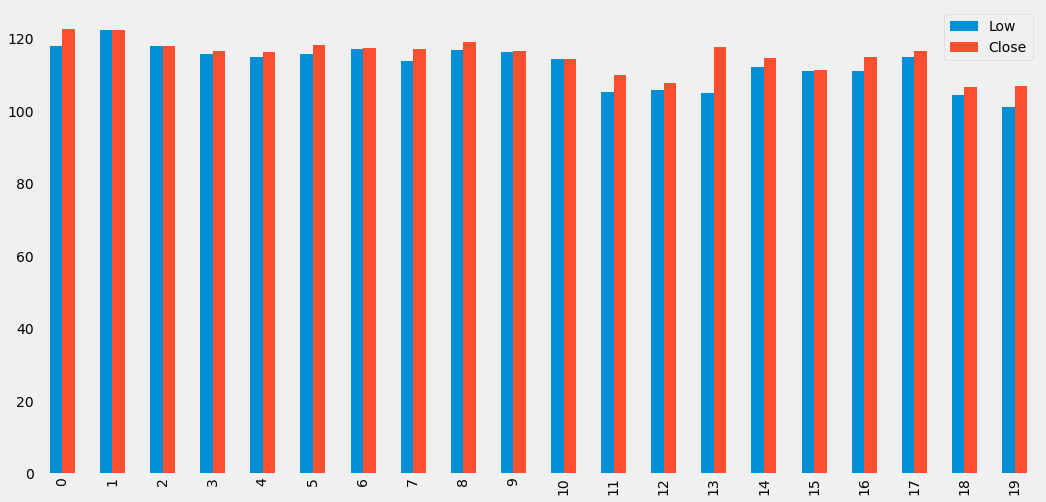

In [14]:
#Plot Low vs Close
nflx_df[["Low","Close"]].head(20).plot(kind="bar",figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Month'] = df['Date'].dt.month
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [16]:
nflx_df['Year']=df['Date'].dt.year
nflx_df['Month']=df['Date'].dt.month
nflx_df['Day']=df['Date'].dt.day

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nfx_df.head(10)

,Day,Month,Year,High,Open,Low,Close
0,16,12,2015,123.000000,119.800003,118.089996,122.639999
1,17,12,2015,126.349998,123.970001,122.419998,122.510002
2,18,12,2015,122.190002,120.849998,117.919998,118.019997
3,21,12,2015,119.589996,119.510002,115.660004,116.629997
4,22,12,2015,117.430000,117.300003,114.860001,116.239998
5,23,12,2015,118.559998,116.910004,115.779999,118.160004
6,24,12,2015,118.800003,118.220001,117.300003,117.330002
7,28,12,2015,117.349998,117.260002,113.849998,117.110001
8,29,12,2015,119.599998,118.190002,116.919998,119.120003
9,30,12,2015,119.019997,118.949997,116.430000,116.709999


In [18]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y= nfx_df.iloc[:, 5]

In [19]:
print(X.shape) #output: (1007, 6)
print(Y.shape) #output: (1007,)

(1007, 6)
(1007,)


In [20]:
#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [21]:
print(x_train.shape) #output: (755, 6)
print(x_test.shape) #output: (252, 6) 
print(y_train.shape) #output: (755,)
print(y_test.shape) #output: (252,)
#y_test to be evaluated with y_pred for Diff models

(755, 6)
(252, 6)
(755,)
(252,)


In [22]:
#Linear Regression Model Training and Testing

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred=lr_model.predict(x_test)

In [24]:
#Linear Model Cross-Validation

from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.9989387349546


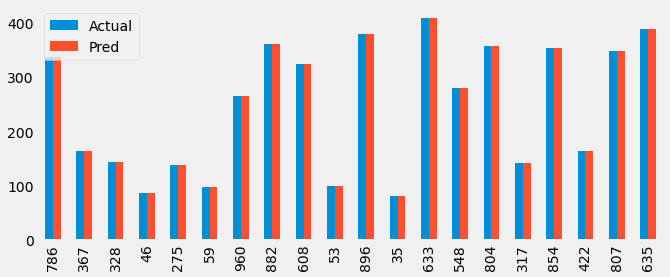

In [25]:
#Plot Actual vs Predicted Value

plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()